In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import requests
import random

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset path is: /content/drive/MyDrive/blurrycards

In [3]:
# !mkdir /content/drive/MyDrive/blurrycars 
%cd /content/drive/MyDrive/blurrycars

[Errno 2] No such file or directory: '/content/drive/MyDrive/blurrycars'
/content


In [ ]:
!7z x /content/drive/MyDrive/blurrycards

In [ ]:
!ls

'"'   0   1   2   Dataset.7z   Test   Train   Valid


In [5]:
files = {}
print("Number of sample in each class is....")
files[0]= os.listdir('/content/drive/MyDrive/blurrycars/0')
print("0:",len(files[0]))
files[1]= os.listdir('/content/drive/MyDrive/blurrycars/1')
print("1:",len(files[1]))
files[2]= os.listdir('/content/drive/MyDrive/blurrycars/2')
print("2:",len(files[2]))

Number of sample in each class is....
0: 1876
1: 283
2: 568


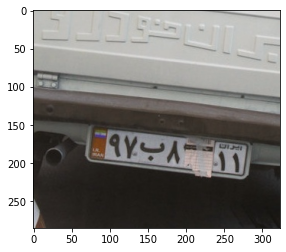

In [ ]:
num  = 1
rndNum = np.random.randint(0,len(files[num])-1)
image = cv2.imread('/content/drive/MyDrive/blurrycars/{}/{}'.format(num,files[num][rndNum]))
plt.imshow( image)

#Save Train, Valid, Test

In [ ]:
from shutil import copyfile

In [ ]:
!rm -r /content/drive/MyDrive/blurrycars/Valid
# !rm -r /content/drive/MyDrive/blurrycars/Test
!rm -r /content/drive/MyDrive/blurrycars/Train

In [ ]:
!mkdir /content/drive/MyDrive/blurrycars/Train 
!mkdir /content/drive/MyDrive/blurrycars/Train/0 
!mkdir /content/drive/MyDrive/blurrycars/Train/1
!mkdir /content/drive/MyDrive/blurrycars/Train/2
!mkdir /content/drive/MyDrive/blurrycars/Valid
!mkdir /content/drive/MyDrive/blurrycars/Valid/0
!mkdir /content/drive/MyDrive/blurrycars/Valid/1
!mkdir /content/drive/MyDrive/blurrycars/Valid/2
# !mkdir /content/drive/MyDrive/blurrycars/Test 
# !mkdir /content/drive/MyDrive/blurrycars/Test/0 
# !mkdir /content/drive/MyDrive/blurrycars/Test/1 
# !mkdir /content/drive/MyDrive/blurrycars/Test/2 

In [ ]:
test = 0
valid = 0.15
basedir = '/content/drive/MyDrive/blurrycars/'

In [ ]:
for i in range(3):
  files[i] = np.array(files[i])
  np.random.shuffle(files[i])
  shape = files[i].shape[0]
  testsize = (int)(test * shape)
  validsize = (int)(valid * shape)
  # [copyfile(basedir + '{}/{}'.format(i,d), basedir+"Test/{}/{}".format(i,d))  for d in files[i][:testsize]]
  [copyfile(basedir + '{}/{}'.format(i,d), basedir+"Valid/{}/{}".format(i,d))  for d in files[i][testsize:testsize+validsize]]
  [copyfile(basedir + '{}/{}'.format(i,d), basedir+"Train/{}/{}".format(i,d)) for d in files[i][testsize+validsize:]]

#Pre-processing

In [6]:
def ImagePreProcessing(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype('uint8')
  gray= cv2.GaussianBlur(gray, (7, 7), 0)
    #gray = cv2.bilateralFilter(gray, 13, 15, 15)
  # th1 = cv2.adaptiveThreshold(gray,1,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
  th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
  rgb = np.repeat(th2[..., np.newaxis],3,-1)
  rgb_flaot = np.array(rgb,dtype=float)
  return 1-rgb_flaot  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


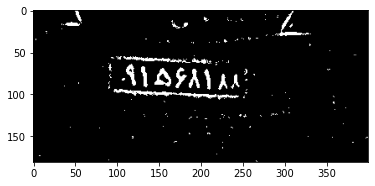

In [7]:
image = load_img('/content/drive/MyDrive/blurrycars/Train/0/0002.jpg')
image = np.array(image)
out = ImagePreProcessing(image)
plt.imshow(out)

In [8]:
def plot_augmentation(datagen, data, n_rows=1, n_cols=5):
  n_images = n_rows * n_cols
  gen_flow = datagen.flow(data)

  aspect_ratio = data.shape[1] / data.shape[2]
  base_size = 2
  fig_size = (n_cols*base_size/aspect_ratio, n_rows*base_size)
  fig = plt.figure(figsize=fig_size)

  for image_index in range(n_images):
    image = next(gen_flow)
    plt.subplot(n_rows, n_cols, image_index+1)
    plt.axis('off')
    plt.imshow(image[0], vmin=0, vmax=255)
  fig.tight_layout(pad=0.0)

In [ ]:
# sm = SVMSMOTE(random_state=42,sampling_strategy='not majority')
# def balanced_flow_from_directory(flow_from_director):
#     for x, y in flow_from_directory:
#          yield sm.fit_resample(x, y)

##Train

In [9]:
from keras.applications.resnet50 import preprocess_input
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=15,brightness_range=[0.4,1.0],zoom_range=0.1,preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    directory= "/content/drive/MyDrive/blurrycars/Train",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    shuffle=True,
    seed=42,
)

# train_balanced_generator = balanced_flow_from_directory(train_generator)

Found 2319 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

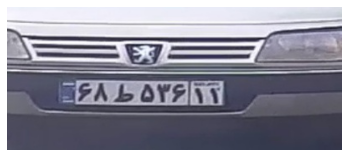

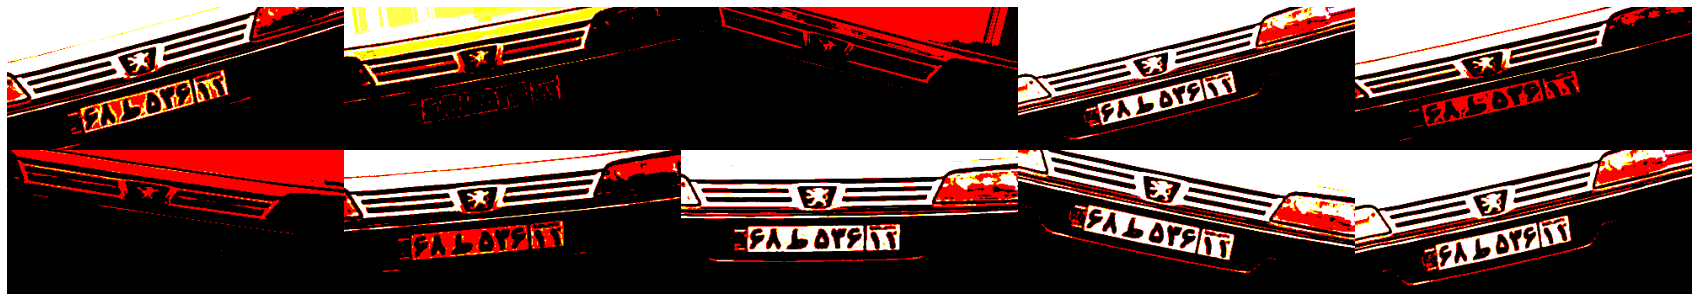

In [10]:
data = ''
image = load_img('/content/drive/MyDrive/blurrycars/Train/0/0001.jpg')
image = np.array(image)
data = np.expand_dims(image, 0)
plt.axis('off')
plt.imshow(data[0])
plot_augmentation(train_datagen, data, n_rows=2, n_cols=5)


##Valid

In [11]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

valid_generator = valid_datagen.flow_from_directory(
    directory= "/content/drive/MyDrive/blurrycars/Valid",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    shuffle=True,
    seed=42,
)


Found 408 images belonging to 3 classes.


In [ ]:
valid_ds

<ShuffleDataset shapes: (), types: tf.string>

##Test

In [ ]:
# test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
# test_generator = test_datagen.flow_from_directory(
#     directory=r"/content/drive/MyDrive/blurrycars/Test",
#     target_size=(224, 100),
#     color_mode="rgb",
#     batch_size=32,
#     class_mode="categorical",
#     shuffle=True,
#     seed=42
# )


Found 271 images belonging to 3 classes.


##Show result for a image

#Train

In [13]:
from keras.models import Model
from keras.models import Model
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
import tensorflow as tf
from keras.callbacks import ModelCheckpoint 
import time

In [14]:
def build_model_with_resnet50():
  model = tf.keras.applications.ResNet50(
      input_shape=(224, 224,3),include_top = True)
  # drop1 = tf.keras.layers.Dropout(0.2)(model.output)
  dens2 = tf.keras.layers.Dense(256,activation='relu')(model.output)
  dens3 = tf.keras.layers.Dense(3,activation='softmax')(dens2)
  model = Model(inputs=model.input, outputs=dens3)
  for layer in model.layers[:15]:
        layer.trainable = False
  return model

In [15]:
def inception_module(layer_in, f1, f2, f3):
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
	conv51 = Conv2D(f3, (3,3), padding='same', activation='relu')(layer_in)
	conv5 = Conv2D(f3, (3,3), padding='same', activation='relu')(conv51)
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out
 
def CNN_model():
  visible = Input(shape=(224,224,3))
  # convlayer = naive_inception_module(visible, 64, 64, 32)
  conv0 = Conv2D(32, (5,3), activation='relu')(visible)
  # conv1 = Conv2D(32, (5,3), activation='relu')(conv0)
  pool1 = MaxPooling2D((3,3), strides=(1,1))(conv0)
  conv2 = Conv2D(16, (3,3), activation='relu')(pool1)
  # inception = inception_module(pool1, 32, 64, 16)
  
  pool2 = MaxPooling2D((3,3), strides=(1,1))(conv2)
  conv3 = Conv2D(16, (3,3), activation='relu')(pool2)
  # gavgpool = GlobalAveragePooling2D()(pool2)
  gavgpool = Flatten()(conv3)
  dens1 = Dense(64, activation='relu')(gavgpool)
  # dens2 = Dense(128, activation='relu')(dens1)
  drop2 = Dropout(0.2)(dens1)
  dens3 = Dense(32, activation='relu')(drop2)
  dens4 = Dense(3, activation='sigmoid')(dens3)
  model = Model(inputs=visible, outputs=dens4)
  return model

In [16]:
checkpoint_filepath = '/content/drive/MyDrive/blurrycars/model.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [17]:
model = build_model_with_resnet50()
# model.summary()
# class_weights = tf.constant([[1.0, 2.0, 3.0]])
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'],loss_weights= [0.48490901,2.,1.])
# model.fit(train_generator_aug, epochs=60, batch_size=BATCH_SIZE)

102973440/102967424 [==============================] - 1s 0us/step


In [18]:
from sklearn.utils import class_weight
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
# class_weights = class_weight.compute_class_weight(
#            'balanced',
#             np.unique(train_generator.classes), 
#             train_generator.classes)

# print(class_weights)
model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=15,
                    callbacks =[model_checkpoint_callback]
                    
)

Epoch 1/15
72/72 [==============================] - 582s 8s/step - loss: 0.4465 - accuracy: 0.6699 - val_loss: 0.4089 - val_accuracy: 0.6927
Epoch 2/15
72/72 [==============================] - 41s 568ms/step - loss: 0.3031 - accuracy: 0.7697 - val_loss: 0.4508 - val_accuracy: 0.6953
Epoch 3/15
72/72 [==============================] - 41s 570ms/step - loss: 0.2659 - accuracy: 0.8197 - val_loss: 0.4874 - val_accuracy: 0.7240
Epoch 4/15
72/72 [==============================] - 41s 570ms/step - loss: 0.2091 - accuracy: 0.8618 - val_loss: 0.2420 - val_accuracy: 0.8802
Epoch 5/15
72/72 [==============================] - 41s 571ms/step - loss: 0.1859 - accuracy: 0.8725 - val_loss: 0.3235 - val_accuracy: 0.8125
Epoch 6/15
72/72 [==============================] - 41s 573ms/step - loss: 0.1700 - accuracy: 0.8764 - val_loss: 0.1942 - val_accuracy: 0.8802
Epoch 7/15
72/72 [==============================] - 41s 570ms/step - loss: 0.1800 - accuracy: 0.8652 - val_loss: 0.3727 - val_accuracy: 0.8047
E

In [20]:
model.load_weights('/content/drive/MyDrive/blurrycars/model.h5')
model.evaluate(valid_generator,
steps=STEP_SIZE_VALID)

12/12 [==============================] - 2s 131ms/step - loss: 0.1463 - accuracy: 0.8880


[0.1463441550731659, 0.8880208134651184]

In [ ]:
y_testing = valid_generator.classes

In [ ]:
STEP_SIZE_TEST=valid_generator.n//valid_generator.batch_size
train_generator.reset()
pred=model.predict_generator(valid_generator,
steps=STEP_SIZE_TEST,
verbose=1)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


12/12 [==============================] - 2s 110ms/step


In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
true_labels = valid_generator.classes
predictions = model.predict_generator(valid_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)